In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200
np.random.seed(42)

In [225]:
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))
def sigmoid(x):
    #return 1 / 1  + np.exp(-x)
    return .5 * (1 + np.tanh(.5 * x))

In [202]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

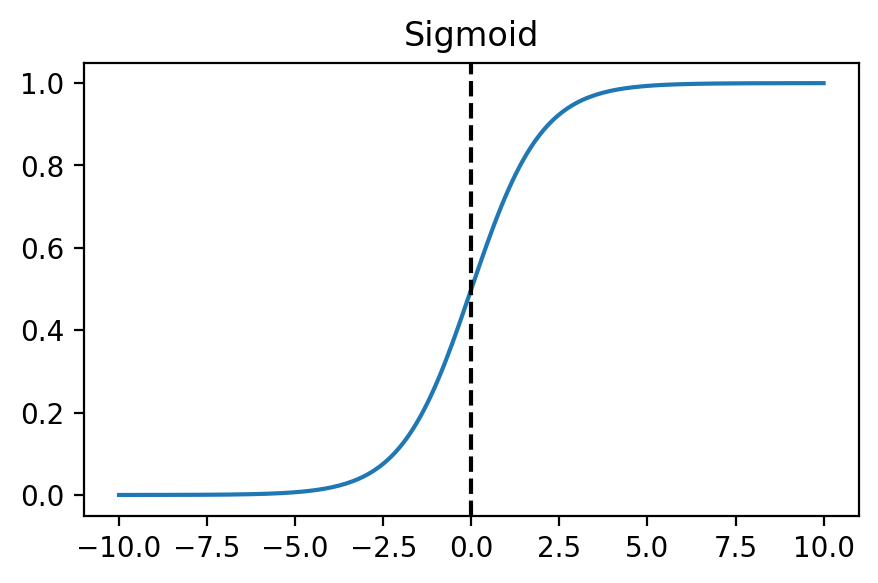

In [157]:
x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid(x))
plt.axvline(x=0, color='k', linestyle='--');
plt.title("Sigmoid");

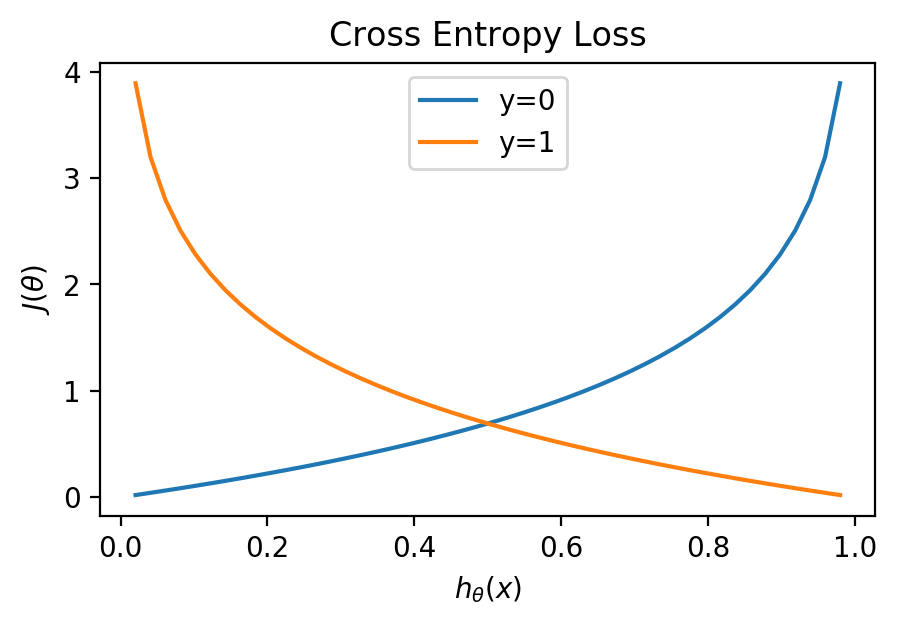

In [158]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

In [315]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    epsilon = 1e-5
    cost = 1 / m * np.sum(
        -y * np.log(h + epsilon) - (1 - y) * np.log(1 - h+epsilon)
    )
    err = y-h
#     print((y-h).shape)
#     print(x.shape)
    grad = 1 / m * (err.T.dot(x))
    return cost, grad

In [341]:
def fit(x, y, max_iter=10000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    print(x.shape)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros((x.shape[1],1))
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
#             print("Hi")
#             print("T = ",theta.shape)
#             print("G = ",grad.shape)
            theta = theta - (alpha * grad)
            
        thetas.append(theta)
    return thetas, classes, costs

In [317]:
def sense_val_inflow(df):
    sense_vals = []
    for x in df['Inflow']:
        if(x <= 1000):
            sense_vals.append(float(1))
        if((x > 1000) and (x <= 10000)):
            sense_vals.append(float(2))
        if((x > 10000) and (x <= 50000)):
            sense_vals.append(float(3))
        if(x > 50000):
            sense_vals.append(float(4))
    return sense_vals

In [339]:
def predict(classes, thetas, x):
    print(x.shape)
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi.dot(theta)) for theta in thetas]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

In [319]:
df = pd.read_csv('allYearLabeledHarangi.csv')
df
a = "RCDATE"
b = "Dates"
df['month'] = pd.DatetimeIndex(df[b]).month
df['year'] = pd.DatetimeIndex(df[b]).year
mask = (df['month'] <= 12)#&(df['month'] >=6))
mask1 = (df['year'] <= 2017)
df = df.loc[mask]
df = df.loc[mask1]
df.drop(['Label'],axis = 1,inplace = True)
#df['Avg'] = (df['MADIKERI']+df['SOMWARPET']+df['VIRAJPET'])/3
#df.to_csv(r"/home/ganesh/Downloads/avg_added_pred.csv")
df.set_index(b,inplace = True)
#df.to_csv(r"/home/ganesh/Downloads/avg_added_pred.csv")     
dataframe = pd.DataFrame(df, columns = ['MADIKERI', 'SOMWARPET', 'VIRAJPET'])
dataframe["minimum"] = dataframe.min(axis = 1)
df.drop(['month','year',"Present Storage(TMC)",'Reservoir Level(TMC)','Outflow'],axis = 1,inplace = True)
#df.drop(['Inflow'],axis = 1,inplace = True)
df['Label'] = sense_val_inflow(df)
#df.to_csv(r"/home/ganesh/Downloads/avg1_added_pred.csv") 
df.drop(['Inflow'],axis = 1,inplace = True)
df
# count = df['Label'].value_counts()
# count

,MADIKERI,SOMWARPET,VIRAJPET,Label
Dates,,,,
2011-01-01,0.000000,0.000000,0.0,1.0
2011-01-02,0.000000,0.000000,0.0,1.0
2011-01-03,0.000000,0.000000,0.0,1.0
2011-01-04,0.000000,0.000000,0.0,1.0
2011-01-05,0.000000,0.000000,0.0,1.0
...,...,...,...,...
2017-12-27,0.036796,0.847864,0.0,1.0
2017-12-28,0.037441,0.862739,0.0,1.0
2017-12-29,0.038087,0.877613,0.0,1.0


In [320]:
values = df.values
values = values.astype('float64')
# normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# data=pd.DataFrame({'Inflow':scaled[:,0],'MADIKERI':scaled[:,1],'SOMWARPET':scaled[:,2],'VIRAJPET':scaled[:,3]})
# print(data.shape)
# idx = pd.date_range('2011-01-01', '2011-12-31') 
# data.set_index(idx)
# frame as supervised learning
reframed = series_to_supervised(values, lag_val,1)#lag of 4 days
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-2,-3,-4]], axis=1, inplace=True)
reframed


,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
4,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
5,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
6,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
7,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
8,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,0.034214,0.788365,0.0,1.0,0.034859,0.803239,0.0,1.0,0.035505,0.818114,0.0,1.0,0.036150,0.832989,0.0,1.0,1.0
2553,0.034859,0.803239,0.0,1.0,0.035505,0.818114,0.0,1.0,0.036150,0.832989,0.0,1.0,0.036796,0.847864,0.0,1.0,1.0
2554,0.035505,0.818114,0.0,1.0,0.036150,0.832989,0.0,1.0,0.036796,0.847864,0.0,1.0,0.037441,0.862739,0.0,1.0,1.0
2555,0.036150,0.832989,0.0,1.0,0.036796,0.847864,0.0,1.0,0.037441,0.862739,0.0,1.0,0.038087,0.877613,0.0,1.0,1.0


In [321]:
# train_x = np.array(df.iloc[:,:3])
# train_x
# train_y = np.array(df.iloc[:,-1])
# train_y

In [322]:
values = reframed.values
train_x = values[:,:-1]
#print(train_x)
train_y = values[:,-1]
train_y = train_y.reshape((train_x.shape[0],1))
print(train_x.shape)
print(train_y.shape)
train_x.shape
train_x

(2553, 16)
(2553, 1)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03550469, 0.81811424, 0.        , ..., 0.86273865, 0.        ,
        1.        ],
       [0.03615023, 0.83298905, 0.        , ..., 0.87761346, 0.        ,
        1.        ],
       [0.03679577, 0.84786385, 0.        , ..., 0.89248826, 0.        ,
        1.        ]])

In [323]:
df1 = pd.read_csv('allYearLabeledHarangi.csv')
df1
a = "RCDATE"
b = "Dates"
df1['month'] = pd.DatetimeIndex(df1[b]).month
df1['year'] = pd.DatetimeIndex(df1[b]).year
mask = ((df1['month'] <= 12)&(df1['month'] >=1))
mask1 = (df1['year'] == 2018)
df1 = df1.loc[mask]
df1 = df1.loc[mask1]
df1.drop(['Label'],axis = 1,inplace = True)
#df['Avg'] = (df['MADIKERI']+df['SOMWARPET']+df['VIRAJPET'])/3
#df.to_csv(r"/home/ganesh/Downloads/avg_added_pred.csv")
df1.set_index(b,inplace = True)
#df.to_csv(r"/home/ganesh/Downloads/avg_added_pred.csv")     
dataframe = pd.DataFrame(df1, columns = ['MADIKERI', 'SOMWARPET', 'VIRAJPET'])
dataframe["minimum"] = dataframe.min(axis = 1)
df1.drop(['month','year',"Present Storage(TMC)",'Reservoir Level(TMC)','Outflow'],axis = 1,inplace = True)
#df.drop(['Inflow'],axis = 1,inplace = True)
df1['Label'] = sense_val_inflow(df1)
#df.to_csv(r"/home/ganesh/Downloads/avg1_added_pred.csv") 
df1.drop(['Inflow'],axis = 1,inplace = True)
df1
count = df1['Label'].value_counts()
count

1.0    269
2.0     64
3.0     31
4.0      1
Name: Label, dtype: int64

In [324]:
values1 = df1.values
values1 = values1.astype('float64')
# normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values1)
# data1=pd.DataFrame({'Inflow':scaled[:,0],'MADIKERI':scaled[:,1],'SOMWARPET':scaled[:,2],'VIRAJPET':scaled[:,3]})
# print(data1.shape)
# idx = pd.date_range('2012-01-01', '2018-12-31') 
# data1.set_index(idx)
# frame as supervised learning
reframed1 = series_to_supervised(values1, lag_val, 1)#lag of 4 days
# drop columns we don't want to predict1
reframed1.head()
reframed1.drop(reframed1.columns[[-2,-3,-4]], axis=1, inplace=True)
reframed1

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
4,0.040023,0.922238,0.0,1.0,0.040669,0.937113,0.0,1.0,0.041315,0.951987,0.0,1.0,0.041960,0.966862,0.0,1.0,1.0
5,0.040669,0.937113,0.0,1.0,0.041315,0.951987,0.0,1.0,0.041960,0.966862,0.0,1.0,0.042606,0.981737,0.0,1.0,1.0
6,0.041315,0.951987,0.0,1.0,0.041960,0.966862,0.0,1.0,0.042606,0.981737,0.0,1.0,0.043251,0.996612,0.0,1.0,1.0
7,0.041960,0.966862,0.0,1.0,0.042606,0.981737,0.0,1.0,0.043251,0.996612,0.0,1.0,0.043897,1.011487,0.0,1.0,1.0
8,0.042606,0.981737,0.0,1.0,0.043251,0.996612,0.0,1.0,0.043897,1.011487,0.0,1.0,0.044542,1.026362,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
361,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
362,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0
363,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.0,1.0


In [325]:
values1 = reframed1.values
test_y = values1[:,-1]
test_x = values1[:,:-1]
test_y = test_y.reshape(test_x.shape[0],1) 
print(train_x.shape,Inflow.shape)
print(test_x.shape)
print(test_y.shape)
#print(list(Actuall_inflow))

(2553, 16) (1066, 1)
(361, 16)
(361, 1)


In [326]:
# test_x = np.array(df1.iloc[:,:3])
# test_x
# test_y = np.array(df1.iloc[:,-1])
# test_y

In [327]:
# from sklearn import datasets
# from sklearn.decomposition import PCA
# iris = datasets.load_iris()
# df = pd.Dataframe(iris)
# # url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# # df = pd.read_csv(url, header=None, names=[
# #     "Sepal length (cm)", 
# #     "Sepal width (cm)", 
# #     "Petal length (cm)",
# #     "Petal width (cm)",
# #     "Species"
# # ])
# # df.head()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target
# X.shape
# y

In [328]:
# #df['Species'] = df['Species'].astype('category').cat.codes
# data = np.array(df)
# np.random.shuffle(data)
# num_train = int(.8 * len(data))  # 80/20 train/test split
# x_train = np.array(df.iloc[:,0:4], dtype=np.float128)
# y_train = np.array(df.Label)


In [329]:
# plt.scatter(x_train[:,2], x_train[:, 1], c=y_train, alpha=0.5)
# plt.xlabel("Petal Length"); plt.ylabel("class");
train_x.shape

(2553, 16)

(2553, 17)


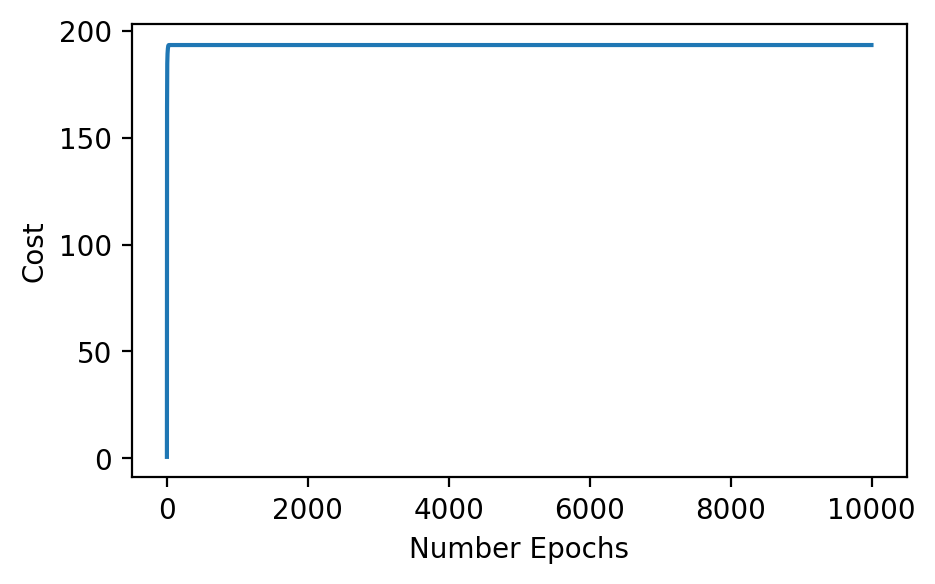

In [342]:
thetas, classes, costs = fit(train_x, train_y)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

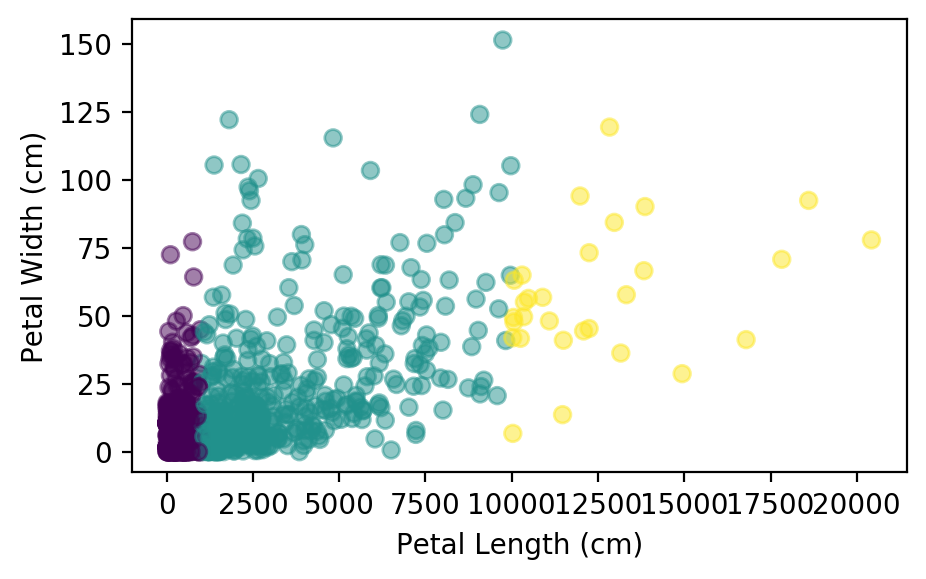

In [337]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");

In [340]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, train_x, train_y):.3f}")
print(f"Test Accuracy: {score(classes, thetas, test_x, test_y):.3f}")

(2553, 16)
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 0, 17, 17, 

IndexError: index 17 is out of bounds for axis 0 with size 3

In [304]:
thetas

[array([[-1.60366624e+02, -6.08738429e+03, -3.56397758e+03,
         -3.39787363e+03, -3.81658781e+02, -6.10906036e+03,
         -3.58923730e+03, -3.44747369e+03, -3.87530698e+02,
         -6.19994112e+03, -3.64941236e+03, -3.49154332e+03,
         -3.94588173e+02, -6.22315051e+03, -3.63083396e+03,
         -3.47068519e+03, -4.02417537e+02],
        [ 4.30524715e+02, -1.11949567e+03,  5.94709385e+02,
         -1.82553637e+03,  3.38649275e+02, -1.94527206e+03,
          1.29573382e+02, -2.33045313e+03,  3.32018437e+02,
         -2.68584407e+03, -2.47906406e+02, -2.66069413e+03,
          3.18326408e+02, -2.94254108e+03, -3.81652306e+02,
         -2.70512176e+03,  3.03832964e+02],
        [ 1.99736817e+02, -4.89003713e+03, -1.73860938e+03,
         -3.32042362e+03,  7.48511426e-01, -4.99160492e+03,
         -1.80156488e+03, -3.39487347e+03, -6.61199987e+00,
         -5.09504598e+03, -1.87095398e+03, -3.44412332e+03,
         -1.53106528e+01, -5.10684875e+03, -1.80987843e+03,
         -3.